<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Logistic_Regression_in_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression in TensorFlow 2.0 (MNIST Data set)

Author: https://theclickreader.com/courses/tensorflow-2-for-deep-learning/lessons/logistic-regression-with-tensorflow/

Modify by: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Read Data set

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Converting data to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

# Batching 
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(256).prefetch(1)

11493376/11490434 [==============================] - 0s 0us/step


## Create Model

In [8]:
class Model:
    def __init__(self):
        self.W = tf.Variable(tf.ones([28*28, 10]), name="weight")
        self.b = tf.Variable(tf.zeros([10]), name="bias")
    def __call__(self, x):
        return tf.nn.softmax(tf.matmul(x, self.W) + self.b)
    
   
def loss(y_pred, y_true):
    # Encode label to a one hot vector
    y_true = tf.one_hot(y_true, depth=10)
    
    # Clip prediction values to avoid log(0) error
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    
    # Compute cross-entropy
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(lr = 0.1)
    

def train(model, x, y):
    with tf.GradientTape() as t:
        pred = model(x)
        current_loss = loss(pred, y)
        print('Current Loss: ', current_loss.numpy())
    # Compute gradients
    gradients = t.gradient(current_loss, [model.W, model.b])
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))

## Train Model

Current Loss:  2.302598
Current Loss:  2.196943
Current Loss:  2.1005516
Current Loss:  2.0115418
Current Loss:  1.9290576
Current Loss:  1.8525742
Current Loss:  1.7816719
Current Loss:  1.7159634
Current Loss:  1.6550753
Current Loss:  1.598643
Current Loss:  1.5463185
Current Loss:  1.4977702
Current Loss:  1.452686
Current Loss:  1.4107739
Current Loss:  1.3717636
Current Loss:  1.3354081
Current Loss:  1.3014787
Current Loss:  1.2697687
Current Loss:  1.2400889
Current Loss:  1.2122676
Current Loss:  1.1861496
Current Loss:  1.161594
Current Loss:  1.1384735
Current Loss:  1.1166724
Current Loss:  1.0960865
Current Loss:  1.0766209
Current Loss:  1.0581897
Current Loss:  1.0407152
Current Loss:  1.0241265
Current Loss:  1.008359
Current Loss:  0.9933547
Current Loss:  0.97905976
Current Loss:  0.9654258
Current Loss:  0.9524073
Current Loss:  0.9399642
Current Loss:  0.9280592
Current Loss:  0.91665804
Current Loss:  0.90572876
Current Loss:  0.8952421
Current Loss:  0.8851721
Cur

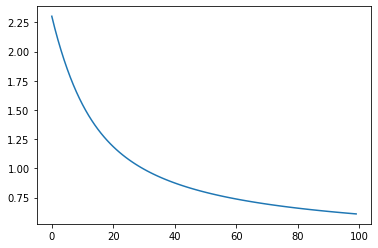

In [9]:
# Initialize the model
model = Model()
epochs = 100
losses = []
for epoch_count in range(epochs):
    current_loss = loss(model(x_train), y_train)
    losses.append(current_loss)
    # Train the model
    train(model, x_train, y_train)
    
import matplotlib.pyplot as plt
plt.plot(losses)    